#### Importing Relevent Liberaries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Task #1 : Merge 12 months of data into single file

In [17]:
files = [file for file in os.listdir('./Sales_Data') if not file.startswith('.')] #get all files as a list ad ignore hidden files

path = './Sales_Data'

all_months_data = pd.DataFrame() 

for file in files:
    df = pd.read_csv(path + '/' + file) #note /
    all_months_data = pd.concat([all_months_data, df])
    
# all_months_data
all_months_data.to_csv('all_data.csv', index = False)

    
# df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
# df.head()

#### Read the updated csv file

In [23]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up data !

#### Drop rows of NaN

In [27]:
# #find all NaN
# nan_df = all_data[all_data.isna().any(axis = 1)]
# display(nan_df.head())

all_data = all_data.dropna()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Find Or and delete it

In [41]:
# invalid literal for int() with base 10: 'Or' so exploring on this error
# temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] #just remove which are not


#### Changing columns to correct type

In [43]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Augment data with more columns

#### Task 02 - Add month columns

In [47]:
all_data['month'] = all_data['Order Date'].str[0:2]

all_data['month'] = all_data['month'].astype('int32')

all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task #03  - Add sales column

In [69]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task #04 - Add a city columns

In [77]:
#using apply method for same
def get_city(x):
    return x.split(',')[1]
def get_state(x):
    return x.split(',')[2].split(' ')[1]

all_data['city'] = all_data['Purchase Address'].apply(lambda x:f'{get_city(x)} ({get_state(x)})')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


#### Question 1: What was best month for sales? How much was earned that month?

In [56]:
sales_res = all_data.groupby('month').sum().Sales

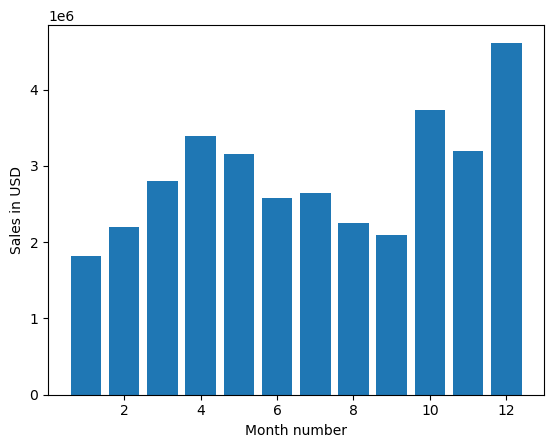

In [68]:
months = range(1,13)
plt.bar(months, sales_res)
# plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel('Month number')
plt.show()

#### Question 2: What city has maximum number of Sales ?

In [ ]:
results = all_data.groupby('city').sum()
results